# Simulated annealing

In the same way we can use Markov Chain Monte Carlo (MCMC) methods to sample analytically intractable posterior distributions, we can use simulated annealing to approximate combinatorially intractable solutions. For example, we use simulated annealing to approximate a solution to the famous traveling salesman problem (TSP). The TSP asks for the optimal path (shortest distance traveled) for a salesman given a map of n cities. Since there are n! possible paths, even for medium $n$, there are too many routes to enumerate and pick the shortest one. 

The algorithm works as follows. First, we initialize a random path to travel. At each subsequent iteration, we propose a new path by randomly transposing or shuffling cities. For our algorithm, we have two methods to propose new paths: (1) swap neighboring cities uniformly at random, or (2) select two cities uniformly at random and flip the order of the cities in between them. In our algorithm, we choose whatever random transposition of cities decreases the distance traveled the most. The algorithm accepts the proposed path according to the classic rules of the Metropolis-Hastings algorithm. 

It should be noted that, unlike the Metropolis sampler, the acceptance probability depends on an added temperature parameter. The temperature of the algorithm is high in early iterations, allowing the algorithm to explore less likely paths (i.e. paths that have higher distances to travel). As the algorithm iterates, the temperature cools down, allowing less moves to paths that increase the distance to travel. The temperature parameter and its cooling schedule let the simulated annealing algorithm explore the state space early on, but as the temperature cools, the algorithm makes less dramatic changes. We are able to find an approximate solution to TSP using several attempts of the algorithm. 

We code the algorithm below. 

In [8]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt


def swap(x): 
    
    n = len(x)
    i  = random.sample(range(0, n), 1)[0]
    if i == 0:
        j = 1
    elif i == n - 1:
        j = n- 2
    else:
        j = i + 1

    y = np.copy(x)
    y[[i, j]] = y[[j, i]]

    return y

def inverse_swap(x):
    
    n = len(x)
    y = np.copy(x)
    i = random.sample(range(0, n - 2), 1)[0]
    j = random.sample(range(i + 1, n), 1)[0]

    y[i:j] = np.flip(x[i:j], axis = 0)

    return y

def distance(x):
    distances = np.zeros(len(x))
    for i in range(len(x) - 1):
        distances[i] = np.linalg.norm(x[i+1] - x[i])
    distances[-1] = np.linalg.norm(x[0] - x[-1]) ## must return to starting position

    return np.sum(distances)

def acceptance_probability(E_new, E_old, Temp):
    if E_new <= E_old:
        prob = 1
    else:
        prob = np.exp(-(E_new - E_old) / Temp)
        
    return min(1, prob)

def New_Temp(Temp, a = .95):
    
    return Temp*a

def New_iterations(iterations, b = 1.05):
    
    x = iterations * b
    
    return math.ceil(x)

def min_configuration(max_stages = 30, start_iterations = 1, start_temp = 10, x = None, b = 1.05, a = .95):

    iterations_schedule = [math.ceil(start_iterations * (b ** ii_stage)) for ii_stage in range(max_stages)]
    total_iterations = np.sum(iterations_schedule)
    total_distance_traveled = np.zeros([total_iterations])
    temp_schedule = [math.ceil(start_temp * (a ** ii_stage)) for ii_stage in range(max_stages)]
    history = np.zeros([total_iterations, np.shape(x)[0], np.shape(x)[1]])
    x_old = x 
    counter = 0
    
    for ii_stage in range(max_stages):

        for j in range(iterations_schedule[ii_stage]): 

            E_old = distance(x_old)
            x_new1 = swap(x_old)
            E_new1 = distance(x_new1)
            x_new2 = inverse_swap(x_old)
            E_new2 = distance(x_new2)

            if E_new1 <= E_new2:
                E_new = E_new1
                x_new = x_new1

            else:
                E_new = E_new2
                x_new = x_new2

            accept_prob = acceptance_probability(E_new = E_new, E_old = E_old, Temp = temp_schedule[ii_stage])

            if np.random.uniform() <= accept_prob:

                x_old = x_new

            else:

                x_old = x_old

            history[counter, :, :] = x_old
            total_distance_traveled[counter] = distance(x_old)
            counter += 1

    return x_old, total_distance_traveled, history

Initial configuration


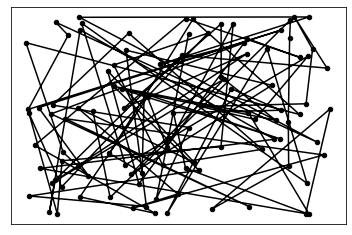

In [9]:
# Generate a random configuration/ordering to start the algorithm

print('Initial configuration')
x = np.random.uniform(low = -20, high = 20, size = 200).reshape(-1, 2)
plt.plot(x[:, 0], x[:, 1], color = 'black')
plt.scatter(x[:, 0], x[:, 1], color = 'black', s = 20)
plt.gca().set_xticks([])
plt.xticks([])
plt.gca().set_yticks([])
plt.yticks([])
plt.show()

In [10]:
# Run simulated annealing algorithm

temp, temp2, history = min_configuration(start_temp = 12, max_stages=100, start_iterations = 40, x = x, b = 1.035, a = .8)

In [19]:
# Make the gif from the simulated annealing history

import imageio

num_images_first = 50
first_iteration_stop = 5000
first_image_nums = [int(temp_image) for temp_image in np.linspace(0, first_iteration_stop, num_images_first)]
num_images_second = 10
second_iteration_stop = np.shape(history)[0] - 1
second_image_nums = [int(temp_image) for temp_image in np.linspace(first_iteration_stop, second_iteration_stop, num_images_second)]
image_nums = np.concatenate((first_image_nums, second_image_nums))
num_images = num_images_first + num_images_second
print('Saving images to write to gif')

for ii_index, ii_image in enumerate(image_nums):

    temp_x = history[ii_image, :, :]
    plt.plot(temp_x[:, 0], temp_x[:, 1], color = 'black')
    plt.scatter(temp_x[:, 0], temp_x[:, 1], color = 'black', s = 20)
    plt.gca().set_xticks([])
    plt.xticks([])
    plt.gca().set_yticks([])
    plt.yticks([])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.savefig(f'tsp_configs/temp_fig{ii_index:.0f}.png')
    plt.close()

images = []
filenames = [f'tsp_configs/temp_fig{ii_image:.0f}.png' for ii_image in range(num_images)]

for filename in filenames:

    images.append(imageio.imread(filename))

print('Writing gif')
imageio.mimsave('tsp.gif', images)

Saving images to write to gif


Writing gif


![tsp gif](tsp.gif)

In [12]:
num_trials = 3
trials = []

for iiTrial in range(num_trials):

    tempMinConfig, tempDistanceToTravel, temp = min_configuration(start_temp = 12, max_stages=100, start_iterations = 40, x = x, b = 1.035, a = .9)
    tempDict = {'configuration': tempMinConfig, 'distance': tempDistanceToTravel}
    trials.append(tempDict)

![tsp distance](tsp_distance.gif)

In [13]:
## Make a gif tracking the total distance traveled over iterations

colors = ['red', 'blue', 'green']
num_iterations = np.size(trials[0]['distance'])
num_images = 200
image_nums = [int(image) for image in np.linspace(0, num_iterations, num_images)]

for ii_index, ii_image in enumerate(image_nums):

    for jj_trial in range(num_trials):

        plt.plot(trials[jj_trial]['distance'][:ii_image], color = colors[jj_trial], label = f"Trial {jj_trial}")
        plt.title('Distance to Travel per Iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Distance')
        plt.ylim([0, 2500])
        plt.legend()

    plt.savefig(f'tsp_configs/temp_distance_fig{ii_index}.png')
    plt.close()

images = []
filenames = [f'tsp_configs/temp_distance_fig{ii_image:.0f}.png' for ii_image in range(num_images)]

for filename in filenames:

    images.append(imageio.imread(filename))

print('Writing gif')
imageio.mimsave('tsp_distance.gif', images)

Writing gif


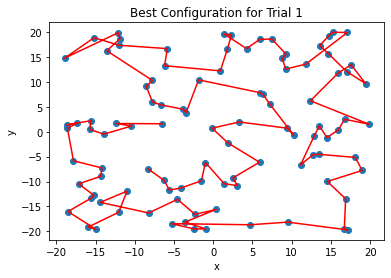

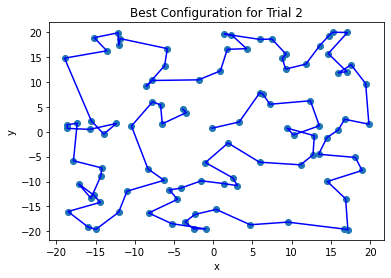

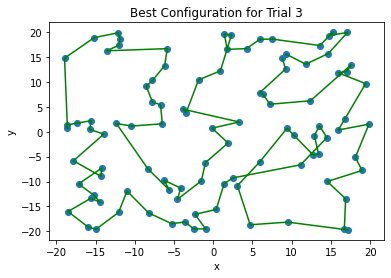

In [14]:
## Consider making gif for the updates 

for ii_trial in range(num_trials):

    plt.scatter(x[:, 0], x[:, 1])
    tempCoords = trials[ii_trial]['configuration']
    plt.plot(tempCoords[:, 0], tempCoords[:, 1], color = colors[ii_trial])
    plt.title(f'Best Configuration for Trial {ii_trial + 1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()